In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from subprocess import check_output

In [31]:
dataframe = pd.read_csv('iris.data.csv')
dataframe

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


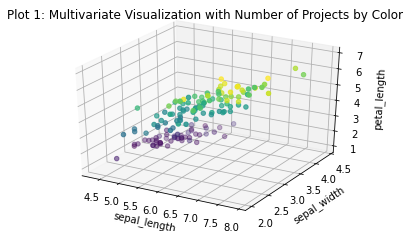

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = dataframe['sepal_length']
y = dataframe['sepal_width']
z = dataframe['petal_length']
c = dataframe['petal_width']
_ = ax.scatter(xs=x, ys=y, zs=z, c=c)
_ = ax.set_xlabel('sepal_length')
_ = ax.set_ylabel('sepal_width')
_ = ax.set_zlabel('petal_length')
_ = plt.title('Plot 1: Multivariate Visualization with Number of Projects by Color')
plt.show()

Text(0, 0.5, 'sepal_width')

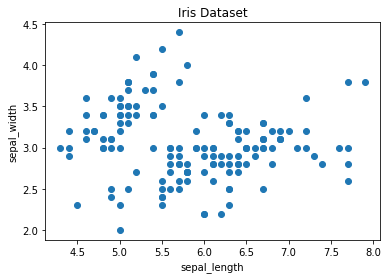

In [33]:
import matplotlib.pyplot as plt

ig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(dataframe['sepal_length'], dataframe['sepal_width'])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

Text(0, 0.5, 'sepal_width')

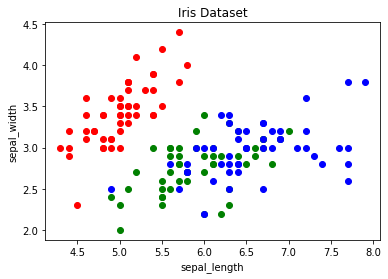

In [34]:
# create color dictionary
colors = {'setosa':'r', 'versicolor':'g', 'virginica':'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(dataframe['sepal_length'])):
    ax.scatter(dataframe['sepal_length'][i], dataframe['sepal_width'][i],color=colors[dataframe['species'][i]])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

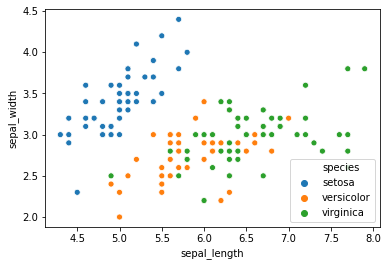

In [35]:
import seaborn as sns
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=dataframe)

In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [58]:
labelEnc=LabelEncoder()

cat_vars=['species']
for col in cat_vars:
    dataframe[col]=labelEnc.fit_transform(dataframe[col])
    dataframe[col]=labelEnc.fit_transform(dataframe[col])

dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [77]:
x = dataframe.iloc[:,:-1]
y = dataframe.iloc[:,-1]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


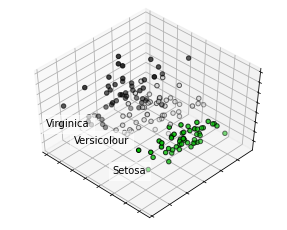

In [88]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(x)
x = pca.transform(x)
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(x[y == label, 0].mean(),
              x[y == label, 1].mean() + 1.5,
              x[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()